In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

In [3]:
d = pd.read_csv('/Users/shriya/Documents/GitHub/logo_detect/ChurnPrediction/data/data.csv')
d.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
d.columns
d.drop('customerID', axis=1, inplace=True)

In [5]:
d.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
d.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
d.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

***Value encoding***

In [8]:
d.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Exploratory Data Analysis**

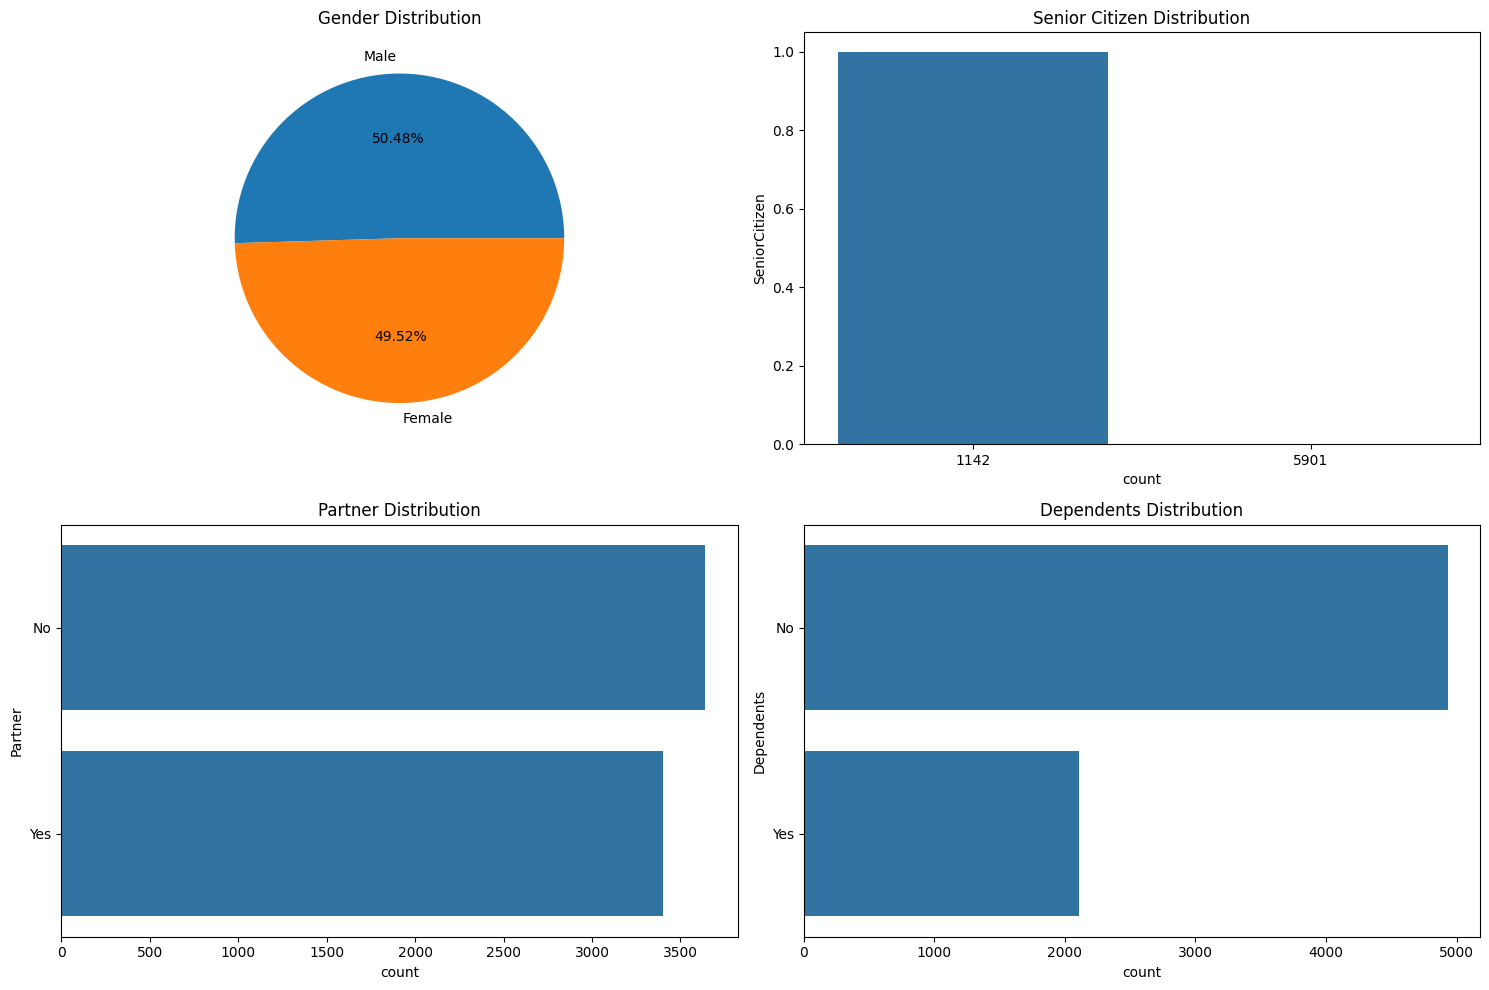

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0,0].pie(d['gender'].value_counts(), labels= ['Male' , 'Female'], autopct = '%1.2f%%')
ax[0,0].set_title('Gender Distribution')

sns.barplot(y=d['SeniorCitizen'].value_counts().index, x=d['SeniorCitizen'].value_counts(), ax=ax[0,1])
ax[0,1].set_title('Senior Citizen Distribution')

sns.barplot(y=d['Partner'].value_counts().index, x=d['Partner'].value_counts(), ax=ax[1,0])
ax[1,0].set_title('Partner Distribution')

sns.barplot(y=d['Dependents'].value_counts().index, x=d['Dependents'].value_counts(), ax=ax[1,1])
ax[1,1].set_title('Dependents Distribution')


plt.tight_layout()
plt.show()


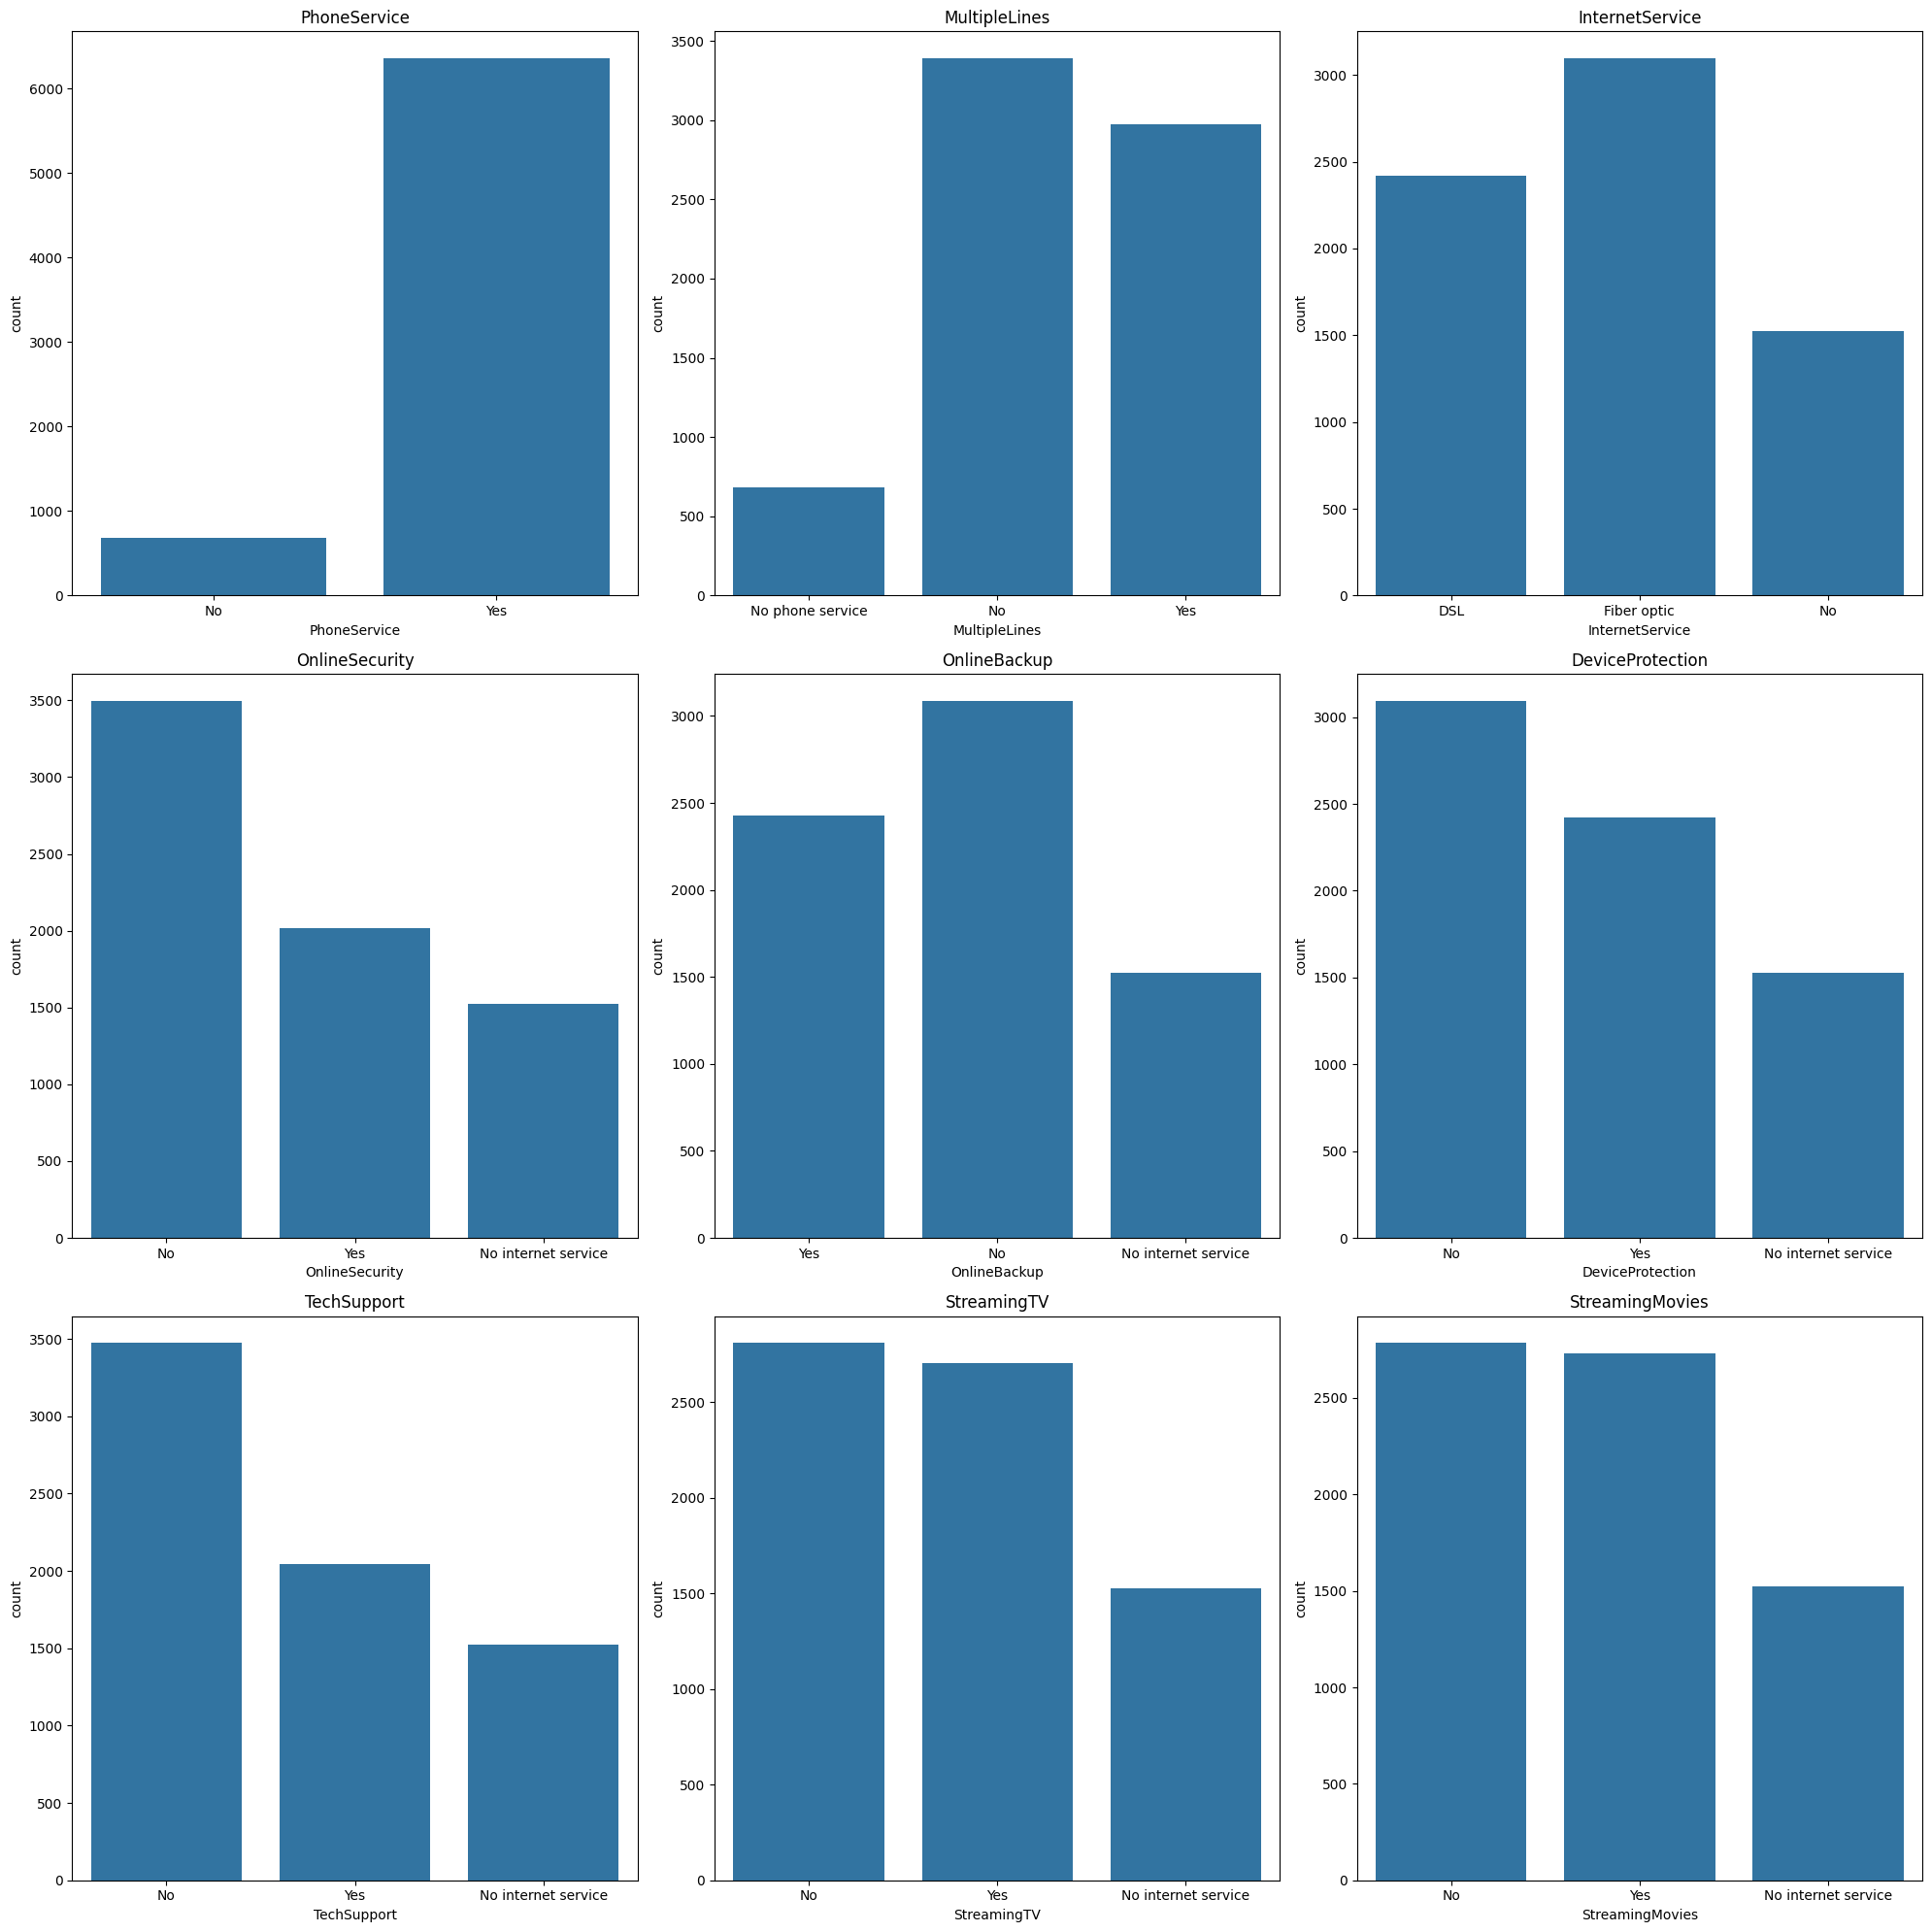

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
service = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for idx , service in enumerate(service) :
    
    r = idx // 3
    c = idx % 3
    sns.countplot(x=d[service], ax=ax[r, c])
    ax[r, c].set_title(service)

plt.tight_layout()
plt.show()


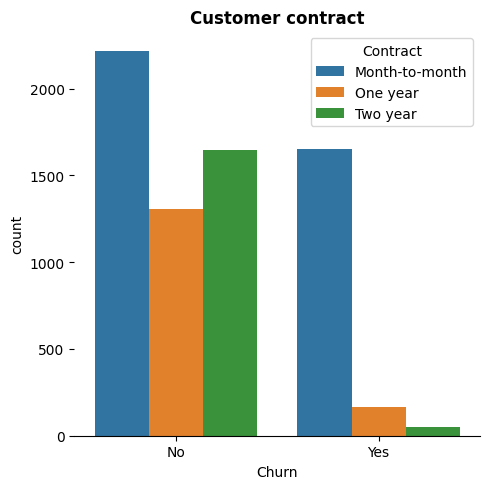

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x="Churn", hue="Contract", data=d)
plt.title("Customer contract", fontweight='bold')
plt.subplots_adjust(bottom=0.2)

plt.tight_layout()
sns.despine(left=True)
plt.show()

**Conclusion** : Month-to-Month customers are churning More

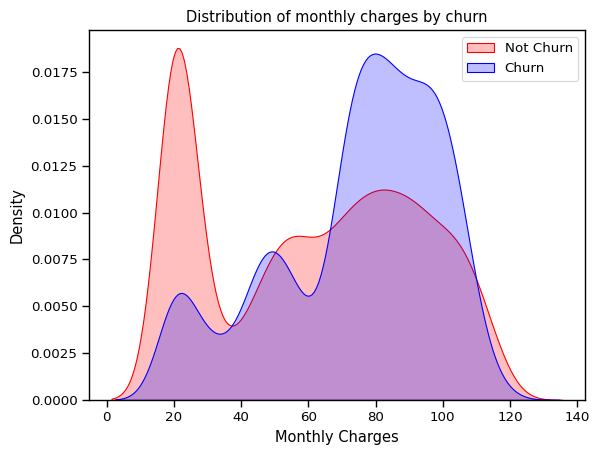

In [12]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(d.MonthlyCharges[(d["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(d.MonthlyCharges[(d["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

**Conclusion** : Customers with more monthly charges are likely to churn more

Text(0.5, 1.0, 'Payment Method')

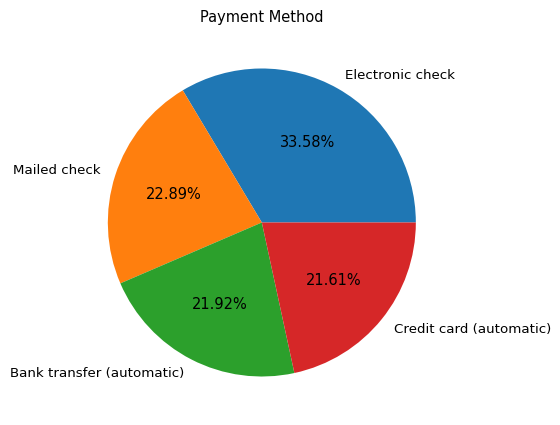

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
labels = d['PaymentMethod'].unique()
ax.pie(d['PaymentMethod'].value_counts(), labels= labels, autopct = '%1.2f%%')
ax.set_title('Payment Method')

Checking which payment method has most churns

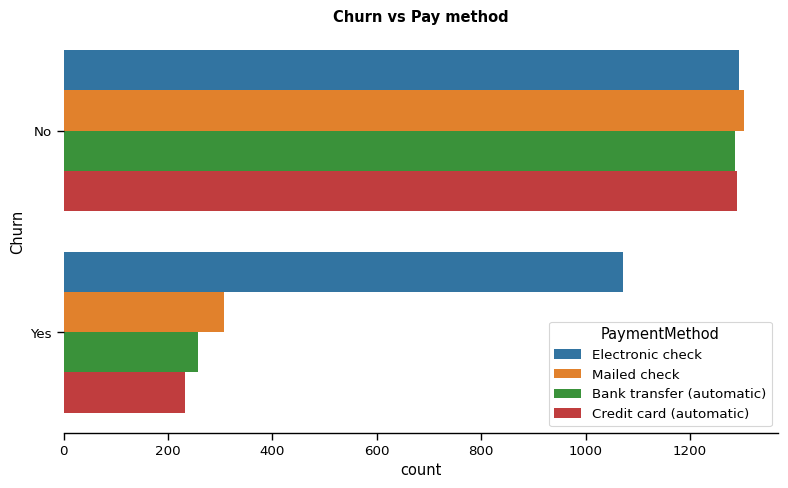

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.countplot(y="Churn", hue="PaymentMethod", data=d)
plt.title("Churn vs Pay method", fontweight='bold')
plt.subplots_adjust(bottom=0.2)

plt.tight_layout()
sns.despine(left=True)
plt.show()

**Do most of the churned customers have short tenure?**

In [15]:
d.groupby('tenure')['Churn'].value_counts(normalize=True)

tenure  Churn
0       No       1.000000
1       Yes      0.619902
        No       0.380098
2       Yes      0.516807
        No       0.483193
                   ...   
70      Yes      0.092437
71      No       0.964706
        Yes      0.035294
72      No       0.983425
        Yes      0.016575
Name: proportion, Length: 145, dtype: float64

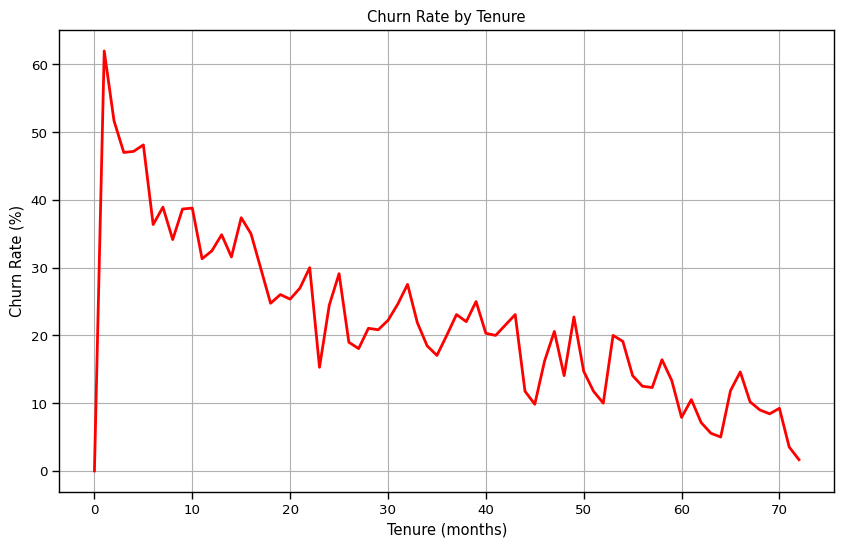

In [16]:
d['tenure'] = pd.to_numeric(d['tenure'])
churn_by_tenure = d.groupby('tenure')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)

plt.figure(figsize=(10, 6))
plt.plot(churn_by_tenure.index, churn_by_tenure.values, 'r-', linewidth=2)
plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure')
plt.grid(True)
plt.show()

1) Customers are most likely to churn in their first few months
2) This suggests issues with onboarding, service quality, or unmet expectations

**Correlation Matrix**

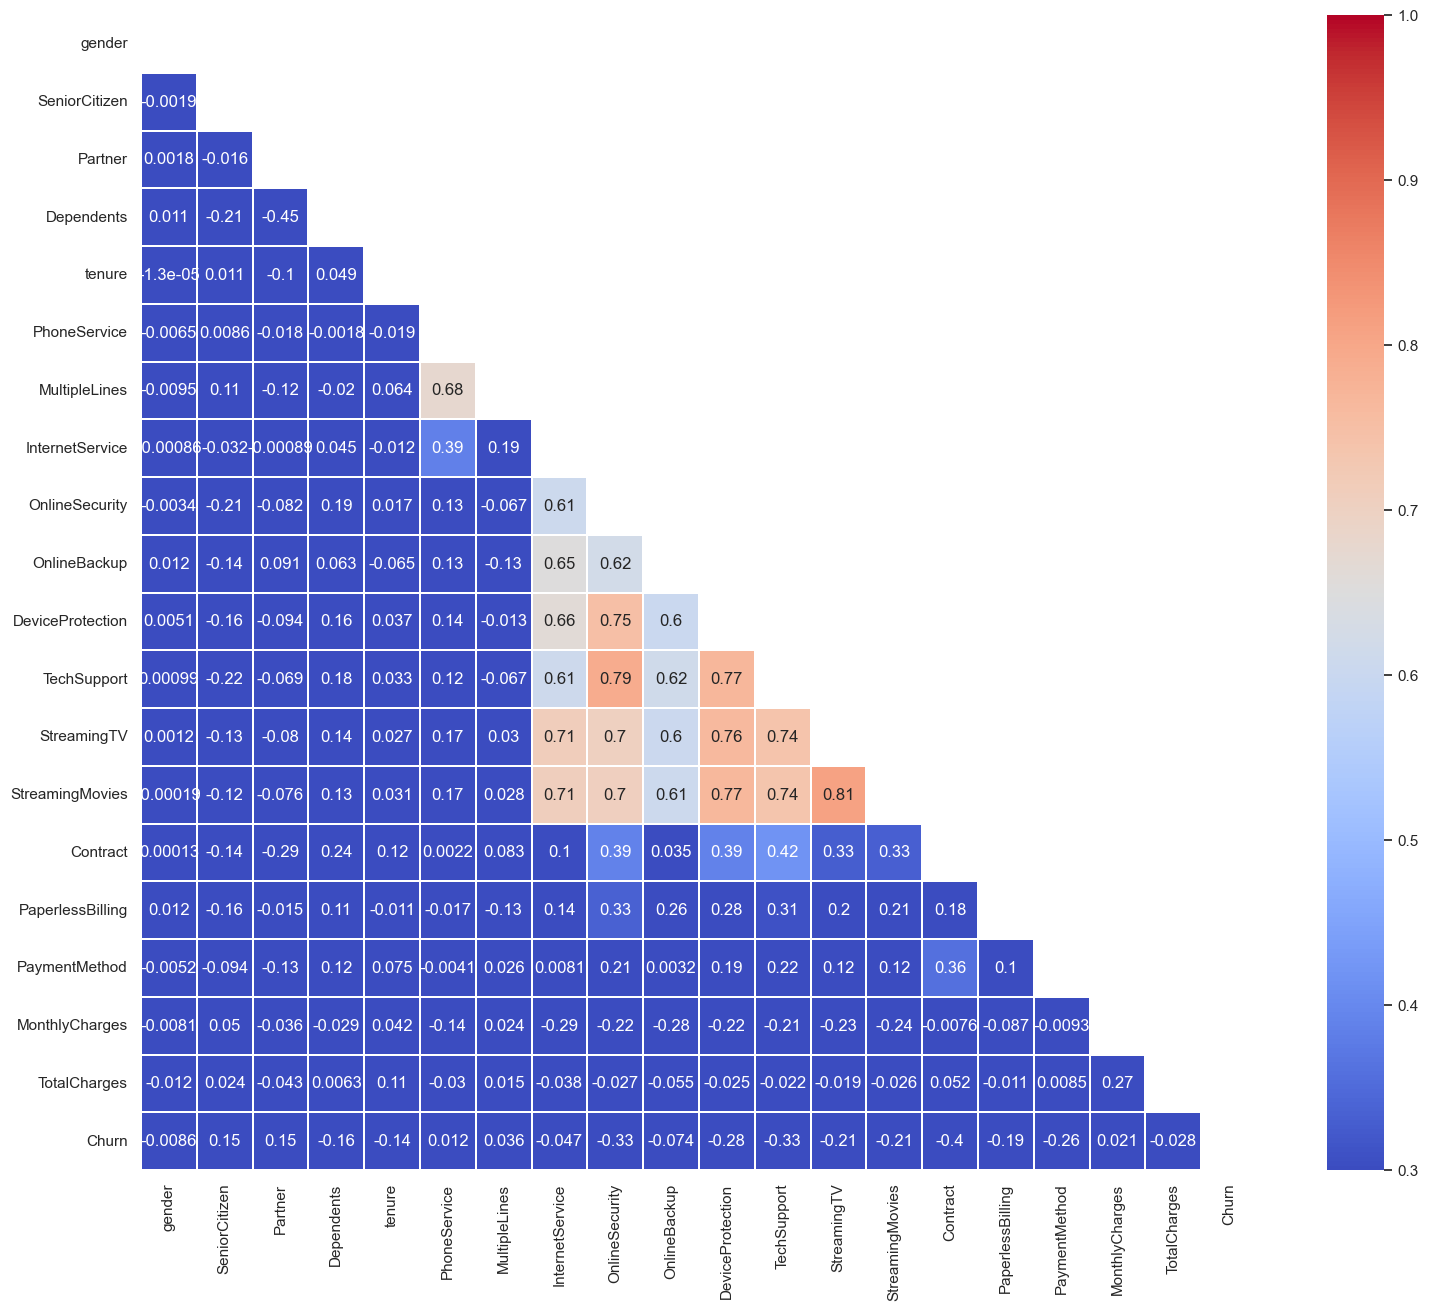

In [17]:
sns.set(style="white")
plt.figure(figsize=(18, 15))

corr = d.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=0.3, vmax=1)

***HANDLING VALUES AND FEATURES***

In [18]:
d['TotalCharges'].value_counts() 

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [19]:
d['TotalCharges'] = d['TotalCharges'].replace(' ', 0)
d['TotalCharges'] = pd.to_numeric(d['TotalCharges'])

In [20]:
! pip install statsmodels

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [22]:
def encode_data(dataframe):
    if dataframe.dtype == "object":
        dataframe = LabelEncoder().fit_transform(dataframe)
    return dataframe

data = d.apply(lambda x: encode_data(x))
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
X = data[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService','PaperlessBilling','MonthlyCharges','TotalCharges']]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns

In [24]:
vif_data 

,feature
0,gender
1,SeniorCitizen
2,Partner
3,Dependents
4,tenure
5,PhoneService
6,PaperlessBilling
7,MonthlyCharges
8,TotalCharges


* VIF = 1: No correlation
* VIF 1-5: Low to moderate correlation (acceptable)
* VIF 5-10: High correlation (caution needed)
* VIF > 10: Very high correlation (problematic)

In [25]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,gender,1.922423
1,SeniorCitizen,1.327817
2,Partner,2.815516
3,Dependents,1.923094
4,tenure,10.694531
5,PhoneService,8.010509
6,PaperlessBilling,2.814037
7,MonthlyCharges,14.056646
8,TotalCharges,12.709898


In [26]:
df  = data.copy()

In [27]:
# Customer value features
df['AvgMonthlySpend'] = df['TotalCharges'] / df['tenure']
df['CustomerLifetimeValue'] = df['TotalCharges']
df['ChargesToTenureRatio'] = df['MonthlyCharges'] / df['tenure']

# Service bundle features  
df['ServiceCount'] = (df['PhoneService']=='Yes').astype(int) + \
                    (df['InternetService']!='No').astype(int) + \
                    (df['OnlineSecurity']=='Yes').astype(int)
                    
# Risk indicators
df['EarlyCustomer'] = (df['tenure'] < 12).astype(int)
df['HighValueCustomer'] = (df['MonthlyCharges'] > df['MonthlyCharges'].quantile(0.75)).astype(int)

In [28]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlySpend,CustomerLifetimeValue,ChargesToTenureRatio,ServiceCount,EarlyCustomer,HighValueCustomer
0,0,0,1,0,1,0,1,0,0,2,...,2,29.85,29.85,0,29.850000,29.85,29.850000,1,1,0
1,1,0,0,0,34,1,0,0,2,0,...,3,56.95,1889.50,0,55.573529,1889.50,1.675000,1,0,0
2,1,0,0,0,2,1,0,0,2,2,...,3,53.85,108.15,1,54.075000,108.15,26.925000,1,1,0
3,1,0,0,0,45,0,1,0,2,0,...,0,42.30,1840.75,0,40.905556,1840.75,0.940000,1,0,0
4,0,0,0,0,2,1,0,1,0,0,...,2,70.70,151.65,1,75.825000,151.65,35.350000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,3,84.80,1990.50,0,82.937500,1990.50,3.533333,1,0,0
7039,0,0,1,1,72,1,2,1,0,2,...,1,103.20,7362.90,0,102.262500,7362.90,1.433333,1,0,1
7040,0,0,1,1,11,0,1,0,2,0,...,2,29.60,346.45,0,31.495455,346.45,2.690909,1,1,0
7041,1,1,1,0,4,1,2,1,0,0,...,3,74.40,306.60,1,76.650000,306.60,18.600000,1,1,0


In [29]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'AvgMonthlySpend',
       'CustomerLifetimeValue', 'ChargesToTenureRatio', 'ServiceCount',
       'EarlyCustomer', 'HighValueCustomer'],
      dtype='object')

In [30]:
finite_values = df['ChargesToTenureRatio'][np.isfinite(df['ChargesToTenureRatio'])]
max_finite_ratio = finite_values.max()
df['ChargesToTenureRatio'] = df['ChargesToTenureRatio'].replace([np.inf, -np.inf], max_finite_ratio)

In [31]:
le_contract = LabelEncoder()
le_internet = LabelEncoder()
le_payment = LabelEncoder()
le_security = LabelEncoder()
le_gender = LabelEncoder()
le_partner = LabelEncoder()

df['Contract_encoded'] = le_contract.fit_transform(df['Contract'])
df['InternetService_encoded'] = le_internet.fit_transform(df['InternetService'])
df['PaymentMethod_encoded'] = le_payment.fit_transform(df['PaymentMethod'])
df['OnlineSecurity_encoded'] = le_security.fit_transform(df['OnlineSecurity'])
df['gender_encoded'] = le_gender.fit_transform(df['gender'])
df['Partner_encoded'] = le_partner.fit_transform(df['Partner'])

# Create key interaction terms
df['Contract_Tenure_Interaction'] = df['Contract_encoded'] * df['tenure']
df['Charges_Tenure_Interaction'] = df['MonthlyCharges'] * df['tenure']
df['Internet_Security_Interaction'] = df['InternetService_encoded'] * df['OnlineSecurity_encoded']
df['Payment_Billing_Interaction'] = df['PaymentMethod_encoded'] * df['PaperlessBilling']
df['Senior_Charges_Interaction'] = df['SeniorCitizen'] * df['MonthlyCharges']
df['EarlyCustomer_HighValue_Interaction'] = df['EarlyCustomer'] * df['HighValueCustomer']
df['ServiceCount_Charges_Interaction'] = df['ServiceCount'] * df['MonthlyCharges']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

# Prepare target
y = LabelEncoder().fit_transform(df['Churn'])  # 1 for 'Yes', 0 for 'No'

# Base features (without interactions)
base_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 
                 'Contract_encoded', 'InternetService_encoded', 'PaymentMethod_encoded',
                 'OnlineSecurity_encoded', 'PaperlessBilling', 'gender_encoded',
                 'Partner_encoded', 'ServiceCount', 'EarlyCustomer', 'HighValueCustomer',
                 'ChargesToTenureRatio', 'CustomerLifetimeValue']

# Features with interactions  
interaction_features = base_features + [
    'Contract_Tenure_Interaction',
    'Charges_Tenure_Interaction', 
    'Internet_Security_Interaction',
    'Payment_Billing_Interaction',
    'Senior_Charges_Interaction',
    'EarlyCustomer_HighValue_Interaction',
    'ServiceCount_Charges_Interaction'
]

X_base = df[base_features]
X_interactions = df[interaction_features]

In [33]:
# Split data
X_base_train, X_base_test, y_train, y_test = train_test_split(
    X_base, y, test_size=0.3, random_state=42, stratify=y
)
X_int_train, X_int_test, _, _ = train_test_split(
    X_interactions, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler_base = StandardScaler()
scaler_int = StandardScaler()

X_base_train_scaled = scaler_base.fit_transform(X_base_train)
X_base_test_scaled = scaler_base.transform(X_base_test)
X_int_train_scaled = scaler_int.fit_transform(X_int_train)
X_int_test_scaled = scaler_int.transform(X_int_test)



In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

# Your original models list
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')))
models.append(('SVC', SVC(kernel='linear', random_state=0, probability=True)))  # Added probability=True for AUC
models.append(('Kernel SVM', SVC(kernel='rbf', random_state=0, probability=True)))  # Added probability=True for AUC
models.append(('KNN', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion='entropy', random_state=0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)))
models.append(("Adaboost", AdaBoostClassifier(random_state=0)))
models.append(("Gradient boost classifier", GradientBoostingClassifier(random_state=0)))

# Results storage
results = []

print("=" * 80)
print("MODEL COMPARISON: BASE FEATURES vs INTERACTION FEATURES")
print("=" * 80)

for name, model in models:
    print(f"\n{'='*20} {name} {'='*20}")
    
    try:
        # Train on base features
        model_base = model
        model_base.fit(X_base_train_scaled, y_train)
        
        # Train on interaction features (clone the model for fair comparison)
        from sklearn.base import clone
        model_interactions = clone(model)
        model_interactions.fit(X_int_train_scaled, y_train)
        
        # Get predictions
        y_pred_base = model_base.predict(X_base_test_scaled)
        y_pred_int = model_interactions.predict(X_int_test_scaled)
        
        # Calculate accuracy
        acc_base = accuracy_score(y_test, y_pred_base)
        acc_int = accuracy_score(y_test, y_pred_int)
        acc_improvement = acc_int - acc_base
        
        print(f"Base Model Accuracy: {acc_base:.4f}")
        print(f"With Interactions Accuracy: {acc_int:.4f}")
        print(f"Accuracy Improvement: {acc_improvement:.4f}")
        
        # Calculate AUC (if model supports predict_proba)
        auc_base = auc_int = auc_improvement = None
        if hasattr(model_base, 'predict_proba'):
            try:
                y_pred_base_proba = model_base.predict_proba(X_base_test_scaled)[:, 1]
                y_pred_int_proba = model_interactions.predict_proba(X_int_test_scaled)[:, 1]
                
                auc_base = roc_auc_score(y_test, y_pred_base_proba)
                auc_int = roc_auc_score(y_test, y_pred_int_proba)
                auc_improvement = auc_int - auc_base
                
                print(f"Base Model AUC: {auc_base:.4f}")
                print(f"With Interactions AUC: {auc_int:.4f}")
                print(f"AUC Improvement: {auc_improvement:.4f}")
                
            except Exception as e:
                print(f"Could not calculate AUC for {name}: {str(e)}")
        else:
            print("AUC calculation not available (no predict_proba method)")
        
        # Store results
        results.append({
            'Model': name,
            'Base_Accuracy': acc_base,
            'Interaction_Accuracy': acc_int,
            'Accuracy_Improvement': acc_improvement,
            'Base_AUC': auc_base,
            'Interaction_AUC': auc_int,
            'AUC_Improvement': auc_improvement
        })
        
        # Feature importance for tree-based models and linear models
        if hasattr(model_interactions, 'coef_'):
            print(f"\n=== TOP 10 MOST IMPORTANT FEATURES ({name}) ===")
            feature_importance = pd.DataFrame({
                'feature': interaction_features,  # Make sure this variable exists
                'coefficient': model_interactions.coef_[0] if len(model_interactions.coef_.shape) > 1 else model_interactions.coef_,
                'abs_coefficient': np.abs(model_interactions.coef_[0] if len(model_interactions.coef_.shape) > 1 else model_interactions.coef_)
            }).sort_values('abs_coefficient', ascending=False)
            
            print(feature_importance.head(10))
            
            # Show interaction features specifically
            if 'interaction_features' in locals():
                interaction_only = feature_importance[feature_importance['feature'].str.contains('Interaction', na=False)]
                if not interaction_only.empty:
                    print(f"\n=== INTERACTION FEATURES SPECIFICALLY ({name}) ===")
                    print(interaction_only)
        
        elif hasattr(model_interactions, 'feature_importances_'):
            print(f"\n=== TOP 10 MOST IMPORTANT FEATURES ({name}) ===")
            feature_importance = pd.DataFrame({
                'feature': interaction_features,  # Make sure this variable exists
                'importance': model_interactions.feature_importances_
            }).sort_values('importance', ascending=False)
            
            print(feature_importance.head(10))
            
            # Show interaction features specifically
            interaction_only = feature_importance[feature_importance['feature'].str.contains('Interaction', na=False)]
            if not interaction_only.empty:
                print(f"\n=== INTERACTION FEATURES SPECIFICALLY ({name}) ===")
                print(interaction_only)
        
    except Exception as e:
        print(f"Error with {name}: {str(e)}")
        results.append({
            'Model': name,
            'Base_Accuracy': None,
            'Interaction_Accuracy': None,
            'Accuracy_Improvement': None,
            'Base_AUC': None,
            'Interaction_AUC': None,
            'AUC_Improvement': None
        })

# Summary table
print("\n" + "=" * 100)
print("SUMMARY TABLE")
print("=" * 100)

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False, float_format='%.4f'))

# Best improvements
print("\n" + "=" * 50)
print("BEST ACCURACY IMPROVEMENTS")
print("=" * 50)
best_acc = results_df.nlargest(3, 'Accuracy_Improvement')[['Model', 'Accuracy_Improvement']]
print(best_acc.to_string(index=False, float_format='%.4f'))

if results_df['AUC_Improvement'].notna().any():
    print("\n" + "=" * 50)
    print("BEST AUC IMPROVEMENTS")
    print("=" * 50)
    best_auc = results_df.nlargest(3, 'AUC_Improvement')[['Model', 'AUC_Improvement']]
    print(best_auc.to_string(index=False, float_format='%.4f'))

MODEL COMPARISON: BASE FEATURES vs INTERACTION FEATURES

==================== Logistic Regression ====================
Base Model Accuracy: 0.7317
With Interactions Accuracy: 0.7369
Accuracy Improvement: 0.0052
Base Model AUC: 0.8344
With Interactions AUC: 0.8367
AUC Improvement: 0.0024

=== TOP 10 MOST IMPORTANT FEATURES (Logistic Regression) ===
                             feature  coefficient  abs_coefficient
4                   Contract_encoded    -1.226388         1.226388
1                             tenure    -0.612434         0.612434
16       Contract_Tenure_Interaction     0.504352         0.504352
0                      SeniorCitizen     0.400200         0.400200
14              ChargesToTenureRatio     0.320655         0.320655
20        Senior_Charges_Interaction    -0.300797         0.300797
22  ServiceCount_Charges_Interaction     0.275787         0.275787
2                     MonthlyCharges     0.275787         0.275787
7             OnlineSecurity_encoded    -0.2597